In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the train and test data
train=pd.read_excel('Doc_train.xlsx')
test=pd.read_excel('Doc_test.xlsx')

In [4]:
test.head()
#print using head function

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:
test['Fees']=np.nan

In [6]:
train.shape
#check the shape; it has 5961 rows and 7 columns

(5961, 7)

In [7]:
train=pd.concat([train,test],axis=0)
#concat the both train and test dataset

In [8]:
train.head()
#print the concated data - train using head function

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


Will use Regex for extracting perticular pattern from data


In [9]:
#Extract experience numbers from data
train['experience']=train.Experience.str.extract('(\d+)')

In [10]:
train.Place.value_counts()

HSR Layout, Bangalore                97
Andheri West, Mumbai                 97
Dwarka, Delhi                        93
Banjara Hills, Hyderabad             85
Mulund West, Mumbai                  81
                                     ..
Safilguda, Hyderabad                  1
Ondipudur, Coimbatore                 1
Mankhurd, Mumbai                      1
Tv Thampanoor, Thiruvananthapuram     1
Rohini Sector 20, Delhi               1
Name: Place, Length: 948, dtype: int64

In [11]:
#Extracting Place from data

train['place']=train.Place.str.extract(',\s([a-zA-Z]*)$')

In [12]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience,place
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,24,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,12,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,9,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,12,Bangalore
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,20,Chennai


In [13]:
train.Rating.value_counts()

100%    907
98%     402
99%     327
97%     325
96%     285
95%     225
94%     166
93%     143
92%      95
90%      95
91%      86
88%      54
89%      53
85%      35
83%      32
82%      32
86%      27
80%      26
87%      25
84%      20
67%      17
77%      17
71%      16
79%      15
81%      15
73%      13
76%      13
60%      11
70%       8
75%       8
74%       7
78%       7
69%       6
55%       5
56%       5
68%       5
64%       4
72%       3
57%       3
65%       2
33%       2
62%       2
53%       2
63%       2
47%       1
36%       1
52%       1
48%       1
45%       1
40%       1
58%       1
7%        1
Name: Rating, dtype: int64

In [14]:
#Extracting Rating 
train['rating']=train.Rating.str.extract('(\d+)')

In [15]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience,place,rating
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,24,Ernakulam,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,12,Bangalore,98
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,9,Bangalore,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,12,Bangalore,NaN
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,20,Chennai,100


In [16]:
# extracting usefull information from Qualification. As it contains various degree/diploma details. So lets search first


x=np.where(train.Qualification.str.contains('(MBBS|BDS|MD|MS|LCEH|DDVL|BAMS|BSAM|BHMS|DHMS|DNB|Get inspired)')==False)


In [17]:
#Checking what else doctor had done other than above mentioned degree.s
for i in x:
    print(train.iloc[i,:].Qualification)

104     PhD - Orthodontics & Dentofacial Orthopaedics,...
224                                                  GCEH
753                                   39 years experience
829     Diplomate of National Board Exam, Diploma in O...
1030                 Diploma in Otorhinolaryngology (DLO)
1064              GCEH, Certificate in Child Health (CCH)
1265                               Diploma in Dermatology
1297                                              G.A.M.S
2005                                              G.A.M.S
2035    Fellowship in Oral implantlogy, Certified Adva...
2975                                           M.D. (E.H)
4503                                                  DDV
4757    Diploma in Otorhinolaryngology (DLO), Diploma ...
5182                                              G.A.M.S
443                                FRCS - General Surgery
471                                            FWFO, FPFA
1139                               Diploma in Dermatology
1159          

In [18]:
# Making extra columns for each degree's


train['MBBS']=train.Qualification.str.extract('(MBBS)')
train['BDS']=train.Qualification.str.extract('(BDS)')
train['MD']=train.Qualification.str.extract('(MD)')
train['MS']=train.Qualification.str.extract('(MS)')
train['LCEH']=train.Qualification.str.extract('(LCEH)')
train['DDVL']=train.Qualification.str.extract('(DDVL)')
train['BAMS']=train.Qualification.str.extract('(BAMS)')
train['BSAM']=train.Qualification.str.extract('(BSAM)')
train['BHMS']=train.Qualification.str.extract('(BHMS)')
train['DHMS']=train.Qualification.str.extract('(DHMS)')
train['DNB']=train.Qualification.str.extract('(DNB)')
train['Get']=train.Qualification.str.extract('(Get inspired)')

In [19]:
train.columns
#check the column names

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees', 'experience', 'place', 'rating', 'MBBS',
       'BDS', 'MD', 'MS', 'LCEH', 'DDVL', 'BAMS', 'BSAM', 'BHMS', 'DHMS',
       'DNB', 'Get'],
      dtype='object')

In [20]:
#Replaceing NA in created dree's columns with 0

train.iloc[:,10:22]=train.iloc[:,10:22].fillna(0)

In [21]:
#Replaceing each degree with 1

train.iloc[:,10:22]=train.iloc[:,10:22].replace({'MBBS':1,
       'BDS':1,'MD':1,'MS':1,'LCEH':1,'DDVL':1,'BAMS':1,'BSAM':1,'BHMS':1,'DHMS':1,
       'DNB':1,'Get':1})

In [22]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience,place,rating,...,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,24,Ernakulam,100,...,1,1,0,0,0,0,1,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,12,Bangalore,98,...,1,1,0,0,1,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,9,Bangalore,NaN,...,0,1,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,12,Bangalore,NaN,...,0,1,0,0,1,0,0,0,0,0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,20,Chennai,100,...,0,1,0,0,1,0,0,0,0,0


In [23]:
#Choosing attributes which we will use for ML
attributes = ['Profile', 'Fees' , 'experience','place','rating','MBBS','BDS','MD','MS','LCEH','DDVL',
              'BAMS','BSAM','BHMS','DHMS','DNB','Get']

In [24]:
train=train[attributes]

In [25]:
#Final dataframe with missing values
train.head()

,Profile,Fees,experience,place,rating,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,24,Ernakulam,100,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,12,Bangalore,98,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,9,Bangalore,NaN,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,12,Bangalore,NaN,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,20,Chennai,100,0,0,0,1,0,0,1,0,0,0,0,0


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Profile     7948 non-null   object 
 1   Fees        5961 non-null   float64
 2   experience  7948 non-null   object 
 3   place       7916 non-null   object 
 4   rating      3556 non-null   object 
 5   MBBS        7948 non-null   int64  
 6   BDS         7948 non-null   int64  
 7   MD          7948 non-null   int64  
 8   MS          7948 non-null   int64  
 9   LCEH        7948 non-null   int64  
 10  DDVL        7948 non-null   int64  
 11  BAMS        7948 non-null   int64  
 12  BSAM        7948 non-null   int64  
 13  BHMS        7948 non-null   int64  
 14  DHMS        7948 non-null   int64  
 15  DNB         7948 non-null   int64  
 16  Get         7948 non-null   object 
dtypes: float64(1), int64(11), object(5)
memory usage: 1.1+ MB


In [115]:
train.describe()

,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,...,place_Chennai,place_Coimbatore,place_Delhi,place_Ernakulam,place_Hyderabad,place_Mumbai,place_Thiruvananthapuram,place_no_city,Get_0,Get_Get inspired
count,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,...,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000
mean,0.472315,0.230076,0.390730,0.359480,0.003146,0.029153,0.126888,0.001258,0.125210,0.007550,...,0.143247,0.037332,0.198406,0.023909,0.160654,0.203649,0.014052,0.004614,0.995805,0.004195
std,0.499285,0.420925,0.487965,0.479898,0.056007,0.168252,0.332882,0.035455,0.330991,0.086573,...,0.350361,0.189594,0.398841,0.152783,0.367250,0.402753,0.117718,0.067777,0.064637,0.064637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#From the above statistical table we can understand: We can see that for each column we have the following functions

count- Number of non-null observations here all the columns contain  4768 entries.

mean- Mean of Values here mean of each column is found ie, mean of MBBS column= 0.472315 , BDS is 0.230076 etc

std- Standard Deviation of the Values here stanadard deviation for MBBS is 0.499285 , BDS is 0.420925 etc

min- Minimum value here it shows the min value for MBBS is 0 , for BDS is 0 etc

max- Maximum value it shows the max value for MBBS as  1 , for BDS is  1 etc

25%, 50%, and 75% - IQR values it shows percentile values at 25%,50% and 75% ; for MBBS it is 0 ,0 and 1 respectively

In [113]:
train.isnull().sum()
#check null vales

MBBS                        0
BDS                         0
MD                          0
MS                          0
LCEH                        0
DDVL                        0
BAMS                        0
BSAM                        0
BHMS                        0
DHMS                        0
DNB                         0
Profile_Ayurveda            0
Profile_Dentist             0
Profile_Dermatologists      0
Profile_ENT Specialist      0
Profile_General Medicine    0
Profile_Homeopath           0
experience_1                0
experience_2                0
experience_3                0
experience_4                0
experience_5                0
experience_6                0
experience_7                0
experience_8                0
place_Bangalore             0
place_Chennai               0
place_Coimbatore            0
place_Delhi                 0
place_Ernakulam             0
place_Hyderabad             0
place_Mumbai                0
place_Thiruvananthapuram    0
place_no_c

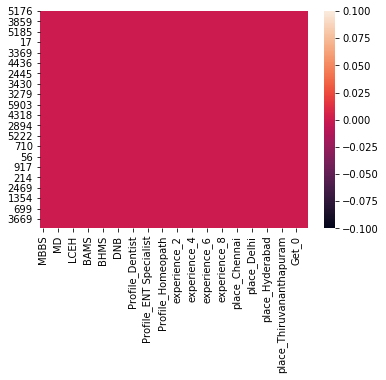

In [114]:
sns.heatmap(train.isnull())
#using heatmap checking null values- here no null values are found

Checking Correlation target and feature columns

In [27]:
corr_mat=train.corr()
#checking correlation

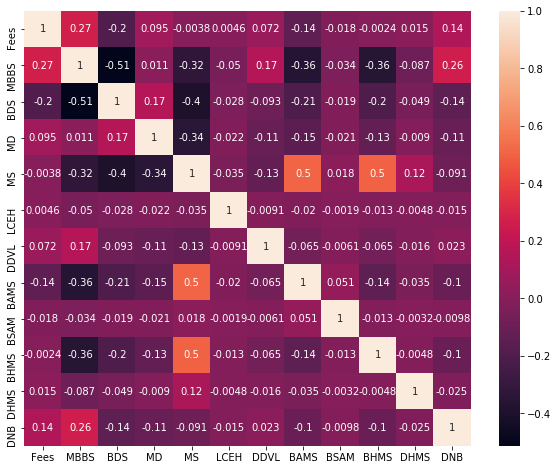

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat,annot=True)

In [29]:
corr_mat['Fees'].sort_values(ascending=False)

Fees    1.000000
MBBS    0.271038
DNB     0.140918
MD      0.095383
DDVL    0.071667
DHMS    0.015443
LCEH    0.004635
BHMS   -0.002423
MS     -0.003847
BSAM   -0.018105
BAMS   -0.139891
BDS    -0.198635
Name: Fees, dtype: float64

From above heatmap we can say that MBBS has good correlation with Target

In [30]:
train.head()

,Profile,Fees,experience,place,rating,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,24,Ernakulam,100,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,12,Bangalore,98,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,9,Bangalore,NaN,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,12,Bangalore,NaN,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,20,Chennai,100,0,0,0,1,0,0,1,0,0,0,0,0


In [31]:
train.Profile=train.Profile.astype('category')

Lets put experience columns into groups

In [32]:
train.experience.value_counts()

9     419
10    404
8     380
11    374
12    358
     ... 
61      1
58      1
64      1
60      1
66      1
Name: experience, Length: 64, dtype: int64

In [33]:
train.experience=train.experience.astype('int64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000154ED699C08>]],
      dtype=object)

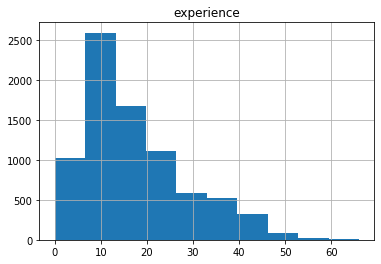

In [34]:
train.hist('experience')
#using histogram checking experience

In [35]:
#assigning y 
y=train.groupby('experience')['Fees'].mean()
y

experience
0     197.931034
2     240.579710
3     257.747748
4     273.643478
5     292.553191
         ...    
60    100.000000
61    100.000000
64    100.000000
65    100.000000
66    100.000000
Name: Fees, Length: 64, dtype: float64

In [36]:
a=[1,2,3,4,5,6,7,8]
train['experience']=pd.cut(train.experience,bins=[0,3,8,14,26,36,45,50,66],labels=a,right=False)

In [37]:
train.head()

,Profile,Fees,experience,place,rating,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,4,Ernakulam,100,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,3,Bangalore,98,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,3,Bangalore,NaN,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,3,Bangalore,NaN,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,4,Chennai,100,0,0,0,1,0,0,1,0,0,0,0,0


In [38]:
train.isnull().sum()

Profile          0
Fees          1987
experience       1
place           32
rating        4392
MBBS             0
BDS              0
MD               0
MS               0
LCEH             0
DDVL             0
BAMS             0
BSAM             0
BHMS             0
DHMS             0
DNB              0
Get              0
dtype: int64

In [39]:
train.rating.isnull().sum()

4392

Since Rating have lot of missing values so dropping it

In [40]:
del train['rating']

In [41]:
# Filling missing values

train[train.experience.isnull()==True]

,Profile,Fees,experience,place,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
372,ENT Specialist,100.0,NaN,Chennai,1,0,0,0,0,0,0,0,0,0,0,0


In [42]:
train.experience=train.experience.fillna(8)

In [43]:
train.place=train.place.fillna('no_city')

Seperating test and train data as it was intial

In [44]:
test=train.iloc[5962:,:]

In [45]:
train=train.iloc[:5961,:]

In [46]:
train.shape

(5961, 16)

In [47]:
train.head()

,Profile,Fees,experience,place,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,4,Ernakulam,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,3,Bangalore,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,3,Bangalore,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,3,Bangalore,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,4,Chennai,0,0,0,1,0,0,1,0,0,0,0,0


In [48]:
train.place=train.place.astype('category')

In [49]:
test.place=test.place.astype('category')

In [50]:
#Hot Encoding 
train=pd.get_dummies(train)

In [51]:
train_label=train.Fees
del train['Fees']

In [52]:
test=pd.get_dummies(test)

In [53]:
train.head()

,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,...,place_Chennai,place_Coimbatore,place_Delhi,place_Ernakulam,place_Hyderabad,place_Mumbai,place_Thiruvananthapuram,place_no_city,Get_0,Get_Get inspired
0,0,0,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5961 entries, 0 to 5960
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   MBBS                      5961 non-null   int64
 1   BDS                       5961 non-null   int64
 2   MD                        5961 non-null   int64
 3   MS                        5961 non-null   int64
 4   LCEH                      5961 non-null   int64
 5   DDVL                      5961 non-null   int64
 6   BAMS                      5961 non-null   int64
 7   BSAM                      5961 non-null   int64
 8   BHMS                      5961 non-null   int64
 9   DHMS                      5961 non-null   int64
 10  DNB                       5961 non-null   int64
 11  Profile_Ayurveda          5961 non-null   uint8
 12  Profile_Dentist           5961 non-null   uint8
 13  Profile_Dermatologists    5961 non-null   uint8
 14  Profile_ENT Specialist    5961 non-null 

In [55]:
del test['Fees']

In [56]:
train.shape

(5961, 36)

In [57]:
test.shape

(1986, 36)

In [58]:
train['Fees']=train_label
train.head()

,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,...,place_Coimbatore,place_Delhi,place_Ernakulam,place_Hyderabad,place_Mumbai,place_Thiruvananthapuram,place_no_city,Get_0,Get_Get inspired,Fees
0,0,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,100.0
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,350.0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,300.0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,250.0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,250.0


In [59]:
# Split data into train and valid
df=train
df_label=df['Fees']
from sklearn.model_selection import train_test_split
train , val = train_test_split(train,test_size=0.20,random_state=67)

In [60]:
train.shape

(4768, 37)

In [61]:
train_label=train.Fees
val_label=val.Fees
del train['Fees']
del val['Fees']

In [62]:
del df['Fees']

Now we are ready to apply algorithms. We will use cross validation and other than that we are going to check with RMSL Error

In [63]:

# defined a function to calculate RMSLE 

def rmsle(predict,real):
    x=np.sqrt(np.mean(np.power((np.log10(real+1)-np.log10(predict+1)),2)))
    return(x,np.std(x))

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


In [65]:
#Cross Vald function

def func(estimator,data,label,folds):
    score=cross_val_score(estimator,train,train_label,cv=folds, scoring='neg_mean_squared_error')
    rmse=np.sqrt(-score)
    return(rmse)

In [66]:
lr=LinearRegression()
score_lr=func(lr,df,df_label,10)

In [67]:
score_lr.mean()

174.2476323178346

In [68]:
lr.fit(df,df_label)
total=lr.predict(val)

In [69]:

rmsle_lr,std_lr=rmsle(total,val_label)

rmsle_lr,std_lr

(0.2860082194998141, 0.0)

In [70]:
from sklearn.linear_model import SGDRegressor
sg=SGDRegressor(tol=1e-30)
score_sg=func(sg,df,df_label,10)
score_sg.mean()


171.9078858701187

In [71]:
sg.fit(train,train_label)
score=sg.predict(val)
rmsle_sg,std_sg=rmsle(score,val_label)
rmsle_sg,std_sg

(0.2883244264465376, 0.0)

In [73]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
score_dtr=func(dtr,df,df_label,10)
score_dtr.mean()


186.6543234589476

In [74]:
dtr.fit(train,train_label)
score=dtr.predict(val)
rmsle_dtr,std_dtr=rmsle(score,val_label)
rmsle_dtr,std_dtr

(0.2940722190250937, 0.0)

In [75]:
from sklearn.svm import SVR
svm=SVR(kernel='rbf',gamma=0.05,C=70)
score_svm=func(svm,df,df_label,10)
score_svm.mean()


174.16322708257468

In [76]:

svm.fit(train,train_label)
score=svm.predict(val)
rmsle_svm,std_svm=rmsle(score,val_label)
rmsle_svm,std_svm

(0.27778331767107856, 0.0)

In [77]:

from sklearn.neighbors import KNeighborsRegressor

score_knn=[]
for k in range(30,70):
    knn=KNeighborsRegressor(k,algorithm='auto')
    score=func(knn,df,df_label,10)
    score=score.mean()
    score_knn.append(score)

In [78]:
pd.Series(score_knn,index=range(30,70)).sort_values()


40    173.128570
35    173.154464
64    173.196973
57    173.213214
41    173.217343
44    173.224976
31    173.238137
62    173.261768
34    173.262534
67    173.262594
68    173.265582
45    173.268235
42    173.281058
66    173.296873
63    173.309818
65    173.334656
61    173.341759
48    173.344998
69    173.350409
39    173.350448
47    173.351852
46    173.352699
37    173.366093
33    173.369480
43    173.375336
56    173.389448
55    173.442079
53    173.446375
52    173.449271
30    173.450179
60    173.465456
32    173.468621
50    173.470103
36    173.496862
38    173.501397
59    173.532083
54    173.575728
58    173.602229
49    173.606446
51    173.633971
dtype: float64

In [79]:

knn=KNeighborsRegressor(40,algorithm='auto')

score=func(knn,train,train_label,10)
score_knn=score.mean()


In [80]:
score_knn

173.1285696228666

In [81]:
knn.fit(train,train_label)
score=knn.predict(val)
rmsle_knn,std_knn=rmsle(score,val_label)
rmsle_knn,std_knn

(0.28755989042429037, 0.0)

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=17)
score=func(rf,df,df_label,10)
score_rf=score.mean()
score_rf

180.14584226349774

In [83]:
rf.fit(train,train_label)
score=rf.predict(val)
rmsle_rf,std_rf=rmsle(score,val_label)
rmsle_rf,std_rf

(0.28652145939996027, 0.0)

In [84]:
from sklearn.tree import ExtraTreeRegressor


etr=ExtraTreeRegressor(random_state=13)
score=func(etr,df,df_label,10)
score_etr=score.mean()
score_etr

186.93979353238268

In [85]:
etr.fit(train,train_label)
score=etr.predict(val)
rmsle_etr,std_etr=rmsle(score,val_label)
rmsle_etr,std_etr

(0.29399792763025145, 0.0)

In [86]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor(dtr,bootstrap=True)
score=func(br,df,df_label,10)
score_br=score.mean()
score_br

182.07615760703248

In [87]:
br.fit(train,train_label)
score=br.predict(val)
rmsle_br,std_br=rmsle(score,val_label)
rmsle_br,std_br

(0.2870510317235857, 0.0)

In [88]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=200)
score=func(ada,df,df_label,10)
score_ada=score.mean()
score_ada

179.85928850693898

In [89]:
ada.fit(train,train_label)
score=ada.predict(val)
rmsle_ada,std_ada=rmsle(score,val_label)
rmsle_ada,std_ada

(0.3073729267212575, 0.0)

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
score=func(gbr,df,df_label,10)
score_gb=score.mean()
score_gb

171.22174055777828

In [91]:
gbr.fit(train,train_label)
score=gbr.predict(val)
rmsle_gb,std_gb=rmsle(score,val_label)
rmsle_gb,std_gb

(0.2822795656353506, 0.0)

In [92]:
import xgboost

xgb=xgboost.XGBRegressor()
score=func(xgb,df,df_label,10)
score_xg=score.mean()
score_xg

[17:56:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

171.01340814451163

In [93]:
xgb.fit(train,train_label)
score=xgb.predict(val)
rmsle_xg,std_xg=rmsle(score,val_label)
rmsle_xg,std_xg

[17:57:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.28218685301943275, 0.0)

In [98]:
table=pd.DataFrame([rmsle_lr,rmsle_sg,rmsle_dtr,rmsle_svm,rmsle_rf,rmsle_ada,rmsle_etr,rmsle_gb,rmsle_knn,rmsle_xg,rmsle_br],
            index=['LinearReg','SGD','Tree','SVM','Random','Ada','Extra','Gradient','knn','xgb','bagging'])


In [99]:
table.sort_values(by=0)


,0
SVM,0.277783
xgb,0.282187
Gradient,0.282280
LinearReg,0.286008
Random,0.286521
bagging,0.287051
knn,0.287560
SGD,0.288324
Extra,0.293998
Tree,0.294072


In [100]:
imp=pd.DataFrame(rf.feature_importances_ ,index=train.columns)


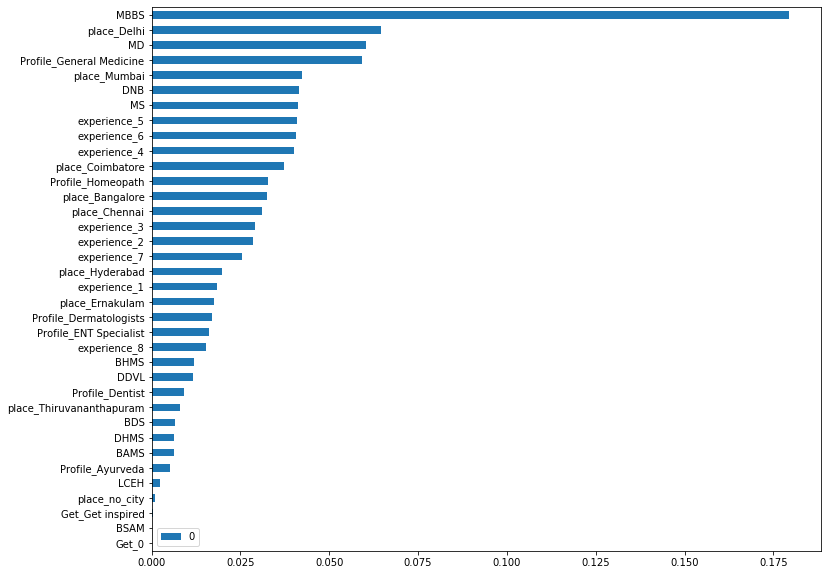

In [101]:
imp.sort_values(by=0).plot.barh(figsize=(12,10))


In [102]:
train.shape , test.shape , val.shape


((4768, 36), (1986, 36), (1193, 36))

In [103]:
from sklearn.model_selection import RandomizedSearchCV


In [104]:
param = {'max_depth':[1,3,5,7,10,13], 'min_child_weight': [0.5,1,3,5,6],'booster':['gbtree','gblinear']}
xgb=XGBRegressor(n_estimators=100 , eta = 0.1 , gamma =0 ,
            subsample=0.8 , colsample_bytree=0.8,  objective= 'reg:linear', seed=13)
rs=RandomizedSearchCV(xgb,param,scoring='neg_mean_squared_error',cv=10)

In [105]:
rs.fit(train,train_label)


[17:59:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:00:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.8, eta=0.1,
                                          gamma=0, importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0...
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=13, silent=None, subsample=0.8,
                                 

In [106]:
rs.best_params_


{'min_child_weight': 3, 'max_depth': 5, 'booster': 'gbtree'}

In [107]:
#Other parameters
param = {'gamma':[i/10.0 for i in range(0,11)]}
xgb=XGBRegressor(n_estimators=100 , eta = 0.1 ,max_depth=3,min_child_weight =5,booster='gbtree',
            subsample=0.8 , colsample_bytree=0.8,  objective= 'reg:linear', seed=13)
rs=RandomizedSearchCV(xgb,param,scoring='neg_mean_squared_error',cv=10)
rs.fit(train,train_label)
rs.best_params_

[18:03:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:05:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

{'gamma': 0.6}

In [108]:
param = {'n_estimators':[500,1000,2000]}
xgb=XGBRegressor(gamma =0.5 ,max_depth=3,min_child_weight =5,eta=0.1,booster='gbtree',
            subsample=0.8 , colsample_bytree=0.8,  objective= 'reg:linear', seed=23)
rs=RandomizedSearchCV(xgb,param,scoring='neg_mean_squared_error',cv=10)
rs.fit(train,train_label)
rs.best_params_


[18:06:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:07:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:07:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

{'n_estimators': 500}

In [109]:
xgb=XGBRegressor(gamma =0.5 ,max_depth=3,min_child_weight =5,eta=0.005,booster='gbtree',subsample=0.8 , colsample_bytree=0.8,  objective= 'reg:linear', seed=43,n_estimatos=500)



In [112]:
xgb.fit(df,df_label)
score=xgb.predict(test)
score

[18:20:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([346.255  , 292.59537, 254.1527 , ..., 349.93964, 215.29956,
       353.4721 ], dtype=float32)

In [111]:
#save the model
from sklearn.externals import joblib
joblib.dump(xgb,"model_Doctor_fee.pkl")

['model_Doctor_fee.pkl']